<a href="https://colab.research.google.com/github/PoojaGhera/my-experiments-notebooks/blob/main/notebooks/supervised-learning-gradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving student_scores.csv to student_scores.csv


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("student_scores.csv")

In [11]:
X = df[['Hours']].values   # features
y = df['Scores'].values    # target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
def predict(X, w, b):
    return w * X[:, 0] + b

In [20]:
def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = predict(X, w, b)
    error = y_pred - y

    dw = (1/n) * np.sum(error * X[:,0])
    db = (1/n) * np.sum(error)

    return dw, db

In [21]:
def compute_loss(X, y, w, b):
    n = len(y)
    y_pred = predict(X, w, b)
    return (1/(2*n)) * np.sum((y_pred - y)**2)

In [22]:
w = 0.0
b = 0.0

alpha = 0.01
num_iters = 1000

loss_history = []

In [23]:
for i in range(num_iters):
    dw, db = compute_gradients(X_train, y_train, w, b)

    w = w - alpha * dw
    b = b - alpha * db

    loss = compute_loss(X_train, y_train, w, b)
    loss_history.append(loss)

    if (i+1) % 100 == 0:
        print(f"Iter {i+1} | Loss = {loss:.4f} | w = {w:.4f} | b = {b:.4f}")

Iter 100 | Loss = 15.8305 | w = 9.8451 | b = 1.8189
Iter 200 | Loss = 15.7968 | w = 9.8159 | b = 1.9998
Iter 300 | Loss = 15.7741 | w = 9.7918 | b = 2.1483
Iter 400 | Loss = 15.7589 | w = 9.7721 | b = 2.2701
Iter 500 | Loss = 15.7486 | w = 9.7560 | b = 2.3701
Iter 600 | Loss = 15.7417 | w = 9.7427 | b = 2.4521
Iter 700 | Loss = 15.7370 | w = 9.7318 | b = 2.5194
Iter 800 | Loss = 15.7339 | w = 9.7229 | b = 2.5746
Iter 900 | Loss = 15.7318 | w = 9.7156 | b = 2.6199
Iter 1000 | Loss = 15.7303 | w = 9.7095 | b = 2.6571


In [24]:
y_test_pred = predict(X_test, w, b)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", rmse)

Test RMSE: 4.339486280091999


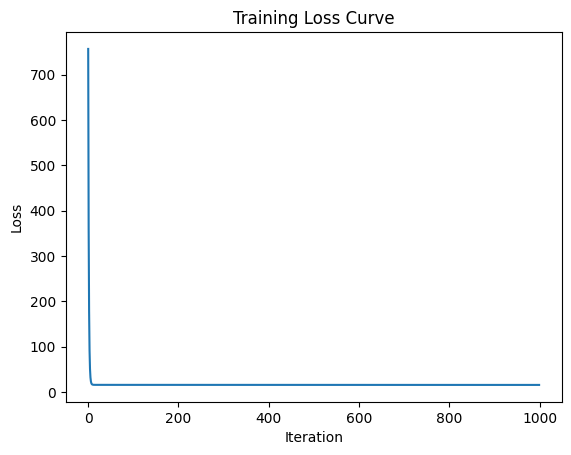

In [25]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

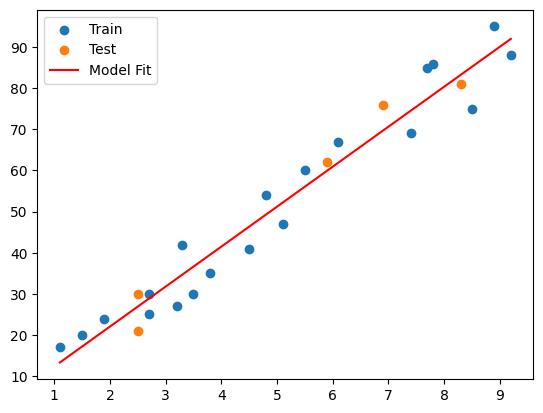

In [26]:
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")

x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = predict(x_line, w, b)

plt.plot(x_line, y_line, color="red", label="Model Fit")
plt.legend()
plt.show()